<a href="https://colab.research.google.com/github/BhaskarKumarSinha/Ml-Deep-Learning-AI-Projects/blob/main/MLProjects/Customer_segmentation_with_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Importing different Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy.cluster.hierarchy as sch
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
sns.set_style('whitegrid')

In [ ]:
# Load the dataset from the user-provided file
!git clone "https://github.com/GeeksforgeeksDS/21-Days-21-Projects-Dataset"
df = pd.read_csv('/content/21-Days-21-Projects-Dataset/Datasets/Mall_Customers.csv')

print("Dataset loaded successfully.")
print(f"Data shape: {df.shape}")
df.head()

Cloning into '21-Days-21-Projects-Dataset'...
remote: Enumerating objects: 22, done.
remote: Counting objects: 100% (22/22), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 22 (delta 3), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (22/22), 1.40 MiB | 5.17 MiB/s, done.
Resolving deltas: 100% (3/3), done.
Dataset loaded successfully.
Data shape: (200, 5)


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
# Basic info and statistics
print("Dataset Info:")
df.info()

# Drop the CustomerID as it's just an identifier and not useful for clustering
df.drop('CustomerID', axis=1, inplace=True)

print("\nDescriptive Statistics:")
print(df.describe())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB

Descriptive Statistics:
              Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000          200.000000              200.000000
mean    38.850000           60.560000               50.200000
std     13.969007           26.264721               25.823522
min     18.000000           15.000000                1.000000
25%     28.750000           41.500000               34.750000
50%     36.000000           61.500000               50.000000
75%     4

In [ ]:
df.isnull().sum()

,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


##Feature Distributions

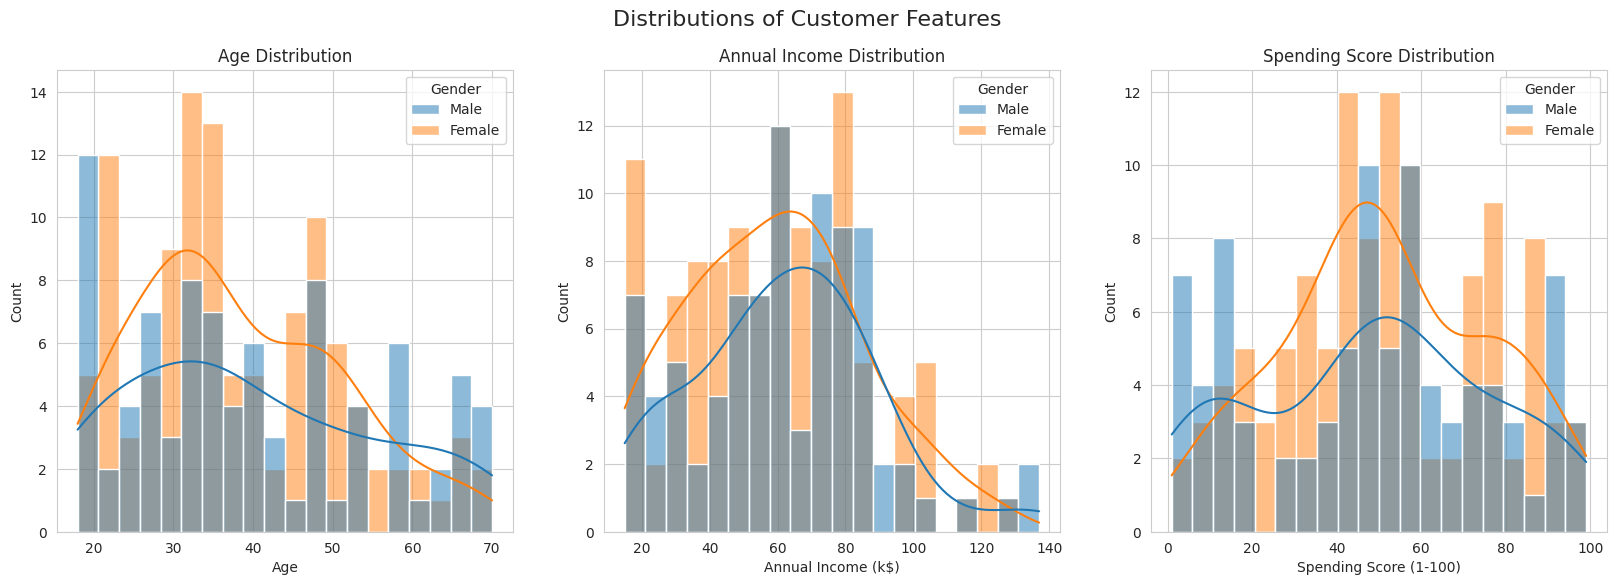

In [ ]:
fig,axes=plt.subplots(1,3,figsize=(20,6))
fig.suptitle('Distributions of Customer Features',fontsize=16)
sns.histplot(ax=axes[0],data=df,x='Age',kde=True,bins=20,hue='Gender').set_title('Age Distribution')
sns.histplot(ax=axes[1],data=df,x='Annual Income (k$)',kde=True,bins=20,hue='Gender').set_title('Annual Income Distribution')
sns.histplot(ax=axes[2],data=df,x='Spending Score (1-100)',kde=True,bins=20,hue='Gender').set_title('Spending Score Distribution')
plt.show()

### Insights from Feature Distributions

Based on the generated plots:

*   **Age Distribution:** The age distribution appears somewhat normally distributed, with a peak around the late 20s to early 40s. There are fewer customers at the younger and older ends of the spectrum.
*   **Annual Income Distribution:** The annual income also shows a distribution that is somewhat centered, with a peak around the 60-80k mark. There are fewer customers with very low or very high incomes.
*   **Spending Score Distribution:** The spending score distribution is interesting. It appears to have multiple peaks, suggesting different groups of customers based on their spending habits. This is a good indicator that clustering could be useful for segmenting these customers. There are notable peaks around spending scores of 1-20, 40-60, and 70-90.

Overall, the plots suggest that there might be distinct groups of customers within the dataset based on their age, income, and spending habits. This further supports the idea of using clustering techniques to identify these groups.

##Bivariate Analysis (Looking For Relationship)

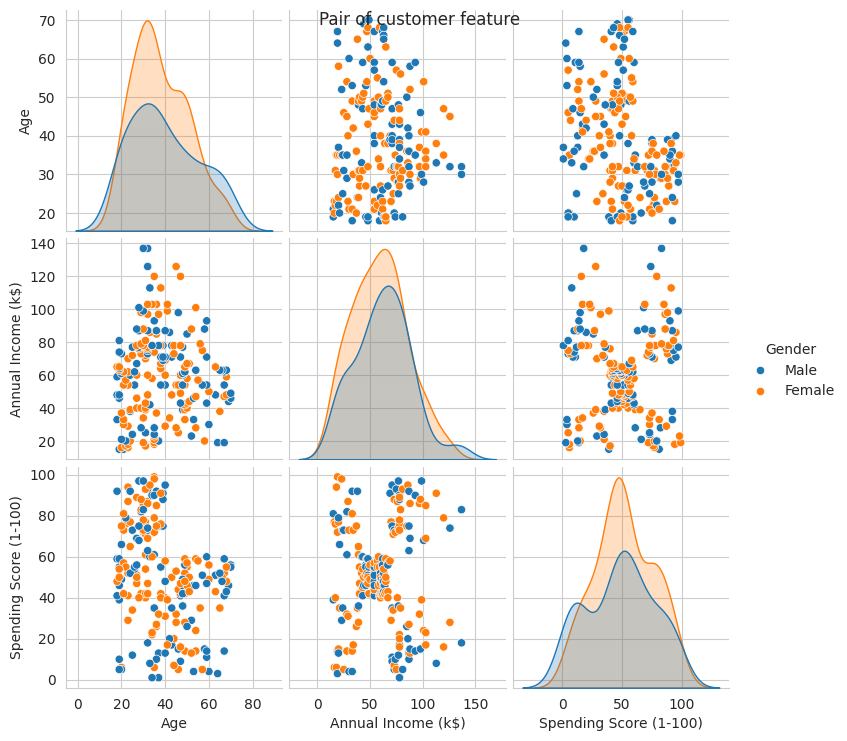

In [ ]:
sns.pairplot(df,vars=['Age','Annual Income (k$)','Spending Score (1-100)'],hue='Gender',diag_kind='kde')
plt.suptitle('Pair of customer feature')
plt.show()

##3d Visualistion

In [ ]:
fig = px.scatter_3d(df,
                    x='Annual Income (k$)',
                    y='Spending Score (1-100)',
                    z='Age',
                    color='Gender',
                    title='3D View of Customer Data')
fig.show()

##Segmenation model

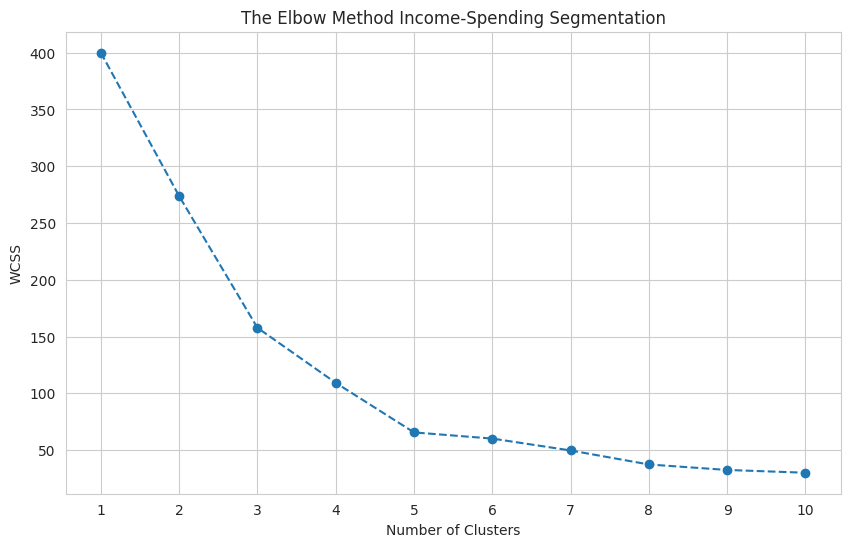

In [ ]:
X1=df[['Annual Income (k$)','Spending Score (1-100)']]
scaler1=StandardScaler()
X1_scaled=scaler1.fit_transform(X1)

#2.Implement the elbow method
wcss1=[]

for k in range(1,11):
  kmeans1=KMeans(n_clusters=k,init='k-means++',random_state=42)
  kmeans1.fit(X1_scaled)
  wcss1.append(kmeans1.inertia_)

###Plot the elbow curve
plt.figure(figsize=(10,6))
plt.plot(range(1,11),wcss1,marker='o',linestyle='--')
plt.title('The Elbow Method Income-Spending Segmentation')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.xticks(range(1,11))
plt.show()

##Build anf fit the model


In [ ]:
kmeans1=KMeans(n_clusters=5,init='k-means++',random_state=42,n_init=10)
df['Income_Cluster']=kmeans1.fit_predict(X1_scaled)

##Visualizing and Interpreting the Income-Based Segments

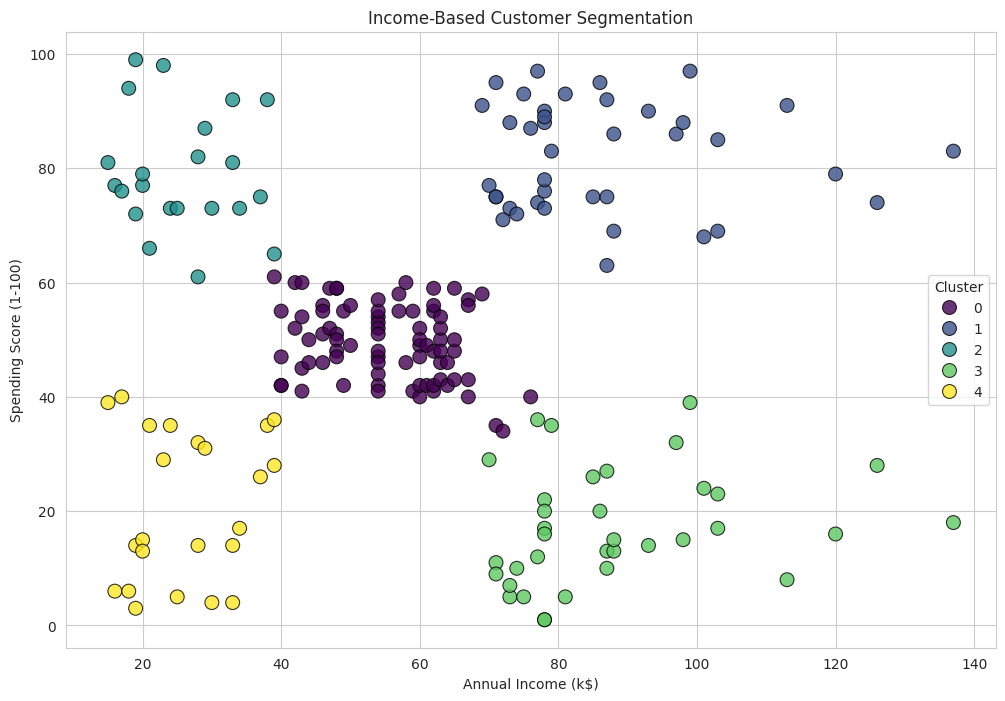

In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Income_Cluster', palette='viridis',s=100, alpha=0.8, edgecolor='black')
plt.title('Income-Based Customer Segmentation')
plt.legend(title='Cluster')
plt.show()

##Quantitative Persona Analysis

In [ ]:
cluster_profiles1 = df.groupby('Income_Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean().round(2)
cluster_profiles1['Size'] = df['Income_Cluster'].value_counts()
print("--- Income-Based Cluster Profiles ---")
cluster_profiles1

--- Income-Based Cluster Profiles ---


,Age,Annual Income (k$),Spending Score (1-100),Size
Income_Cluster,,,,
0,42.72,55.30,49.52,81
1,32.69,86.54,82.13,39
2,25.27,25.73,79.36,22
3,41.11,88.20,17.11,35
4,45.22,26.30,20.91,23


#### 3.2 Income-Based Personas and Strategy
Using the quantitative profiles, we can define our segments:
- **Cluster 0 (Careful High-Earners):** High income (~88k) but low spending (~17). Cautious, value-driven buyers.
- **Cluster 1 (Standard):** Average income (~55k) and spending (~50). This is the largest, core customer group.
- **Cluster 2 (Budget Shoppers):** Low income (~26k) and low spending (~21). Highly price-sensitive.
- **Cluster 3 (Target - High Value):** High income (~87k) and high spending (~82). The mall's prime target.
- **Cluster 4 (Enthusiasts):** Low income (~26k) but high spending (~79). Likely young, trend-focused shoppers.

##Segmentation Model 2-Age & Spending score

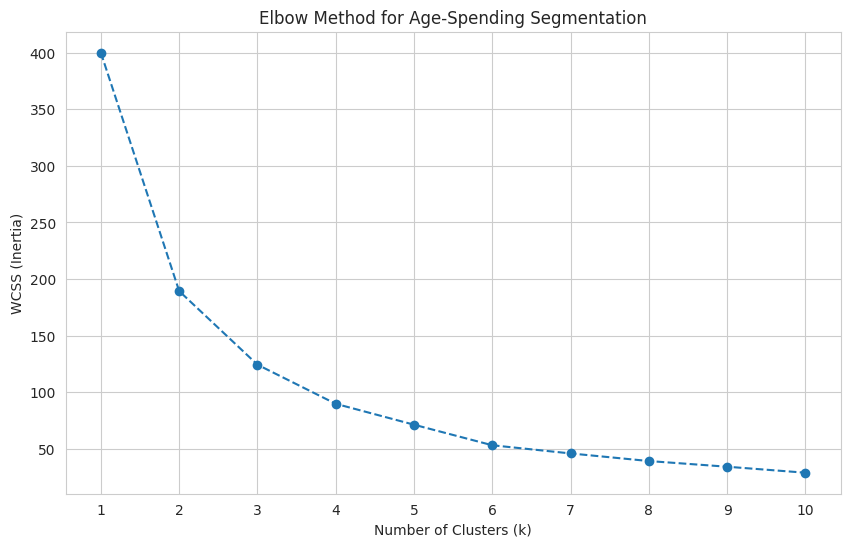

In [ ]:
# 1. Select and scale the features
X2 = df[['Age', 'Spending Score (1-100)']]
scaler2 = StandardScaler()
X2_scaled = scaler2.fit_transform(X2)
# 2. Implement the Elbow Method
wcss2 = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X2_scaled)
    wcss2.append(kmeans.inertia_)

# 3. Plot the Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss2, marker='o', linestyle='--')
plt.title('Elbow Method for Age-Spending Segmentation')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Inertia)')
plt.xticks(range(1, 11))
plt.show()

####The elbow is less sharop here, but k=4 apperas to be a resonable choice

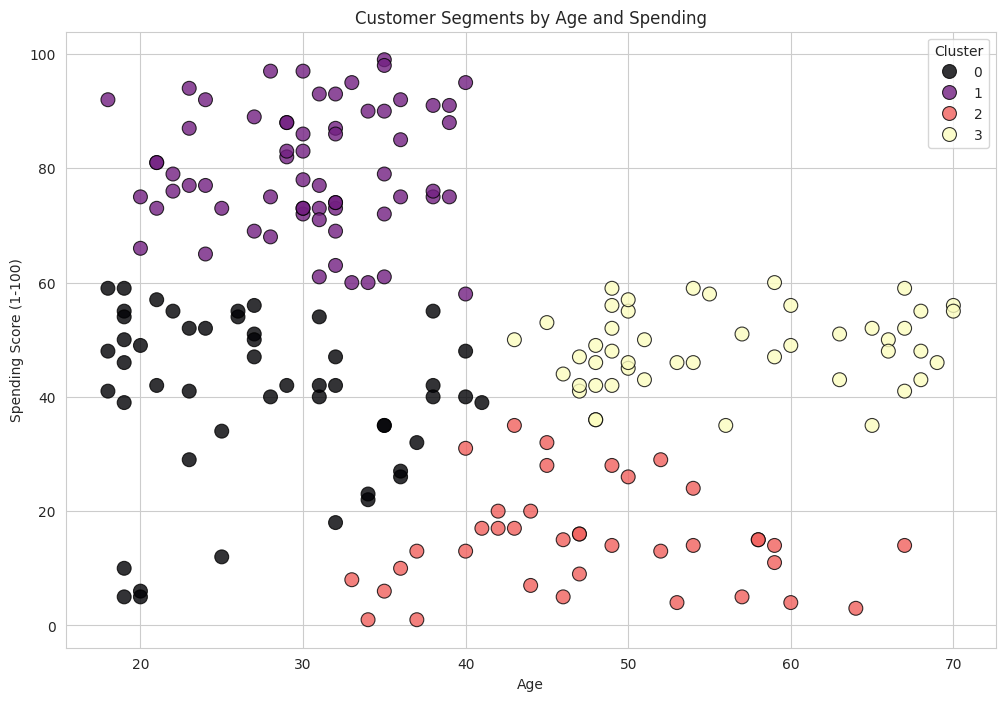

In [ ]:
# Build and fit the final model for age segmentation
kmeans2 = KMeans(n_clusters=4, init='k-means++', random_state=42, n_init=10)
df['Age_Cluster'] = kmeans2.fit_predict(X2_scaled)

# Visualize the new clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='Age', y='Spending Score (1-100)',
                hue='Age_Cluster', palette='magma', s=100, alpha=0.8, edgecolor='black')
plt.title('Customer Segments by Age and Spending')
plt.legend(title='Cluster')
plt.show()

#### 4.1 Interpreting the Age-Based Segments
This model gives us a different perspective:
- **Young High-Spenders:** A clear group of customers under 40 with high spending scores.
- **Young Low-Spenders:** Customers under 40 with low-to-moderate spending.
- **Older Average-Spenders:** Customers over 40 with moderate spending scores.
- **Older Low-Spenders:** A small group of older customers with very low spending scores.

###An Alternative Method - Hierarchical Clustering
To add more depth, let's briefly look at another clustering technique.

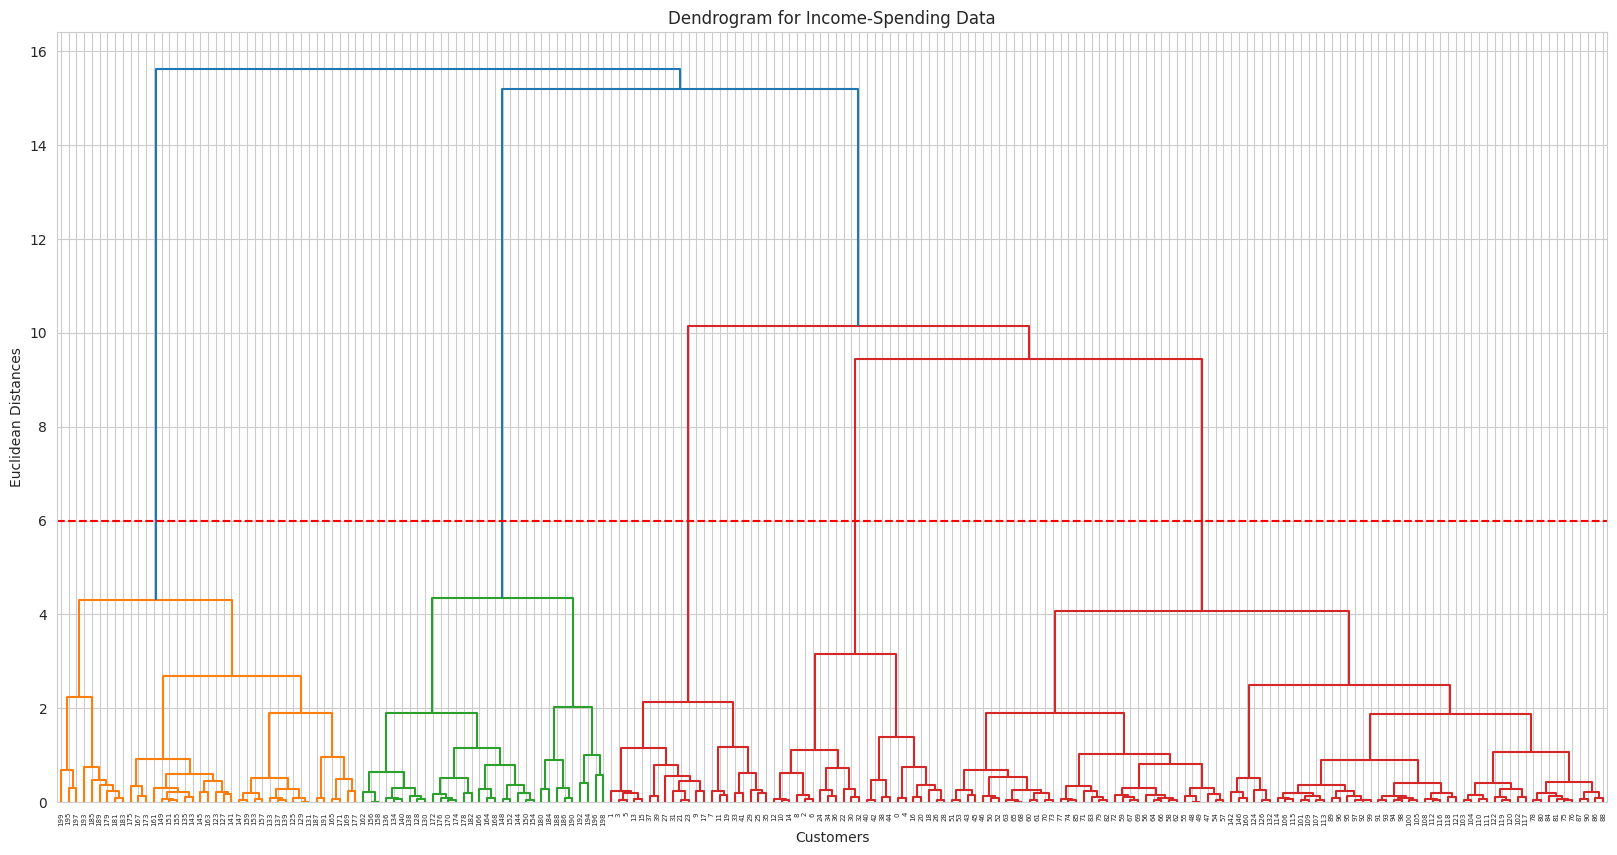

In [ ]:
plt.figure(figsize=(20, 10))
dendrogram = sch.dendrogram(sch.linkage(X1_scaled, method='ward'))
plt.title('Dendrogram for Income-Spending Data')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.axhline(y=6, color='r', linestyle='--') # Example cut-off line
plt.show()

##Submission

##Gender vs. Spending score

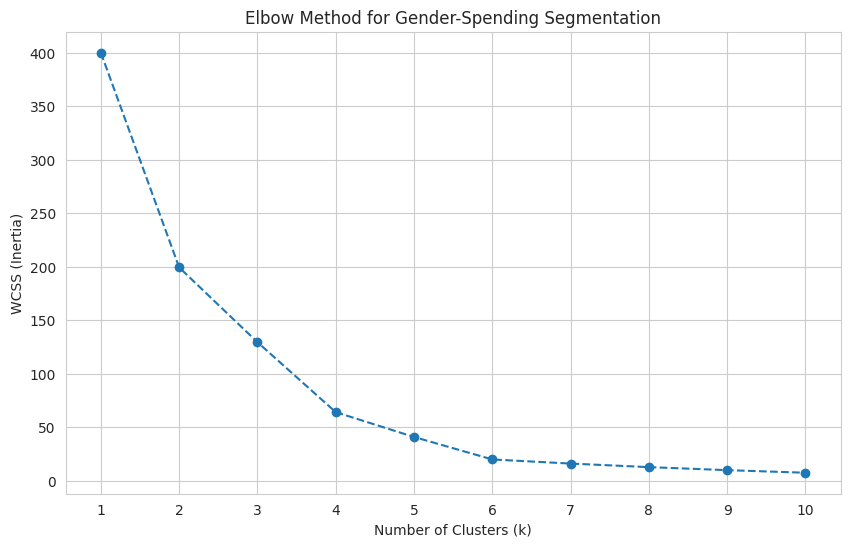

In [ ]:
# 1. Select and scale the features
X3 = df[['Gender', 'Spending Score (1-100)']].copy() # Create a copy to avoid SettingWithCopyWarning
X3 = pd.get_dummies(X3, columns=['Gender'], drop_first=True) # One-hot encode Gender

scaler3 = StandardScaler()
X3_scaled = scaler3.fit_transform(X3)

# 2. Implement the Elbow Method
wcss3 = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X3_scaled)
    wcss3.append(kmeans.inertia_)

# 3. Plot the Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss3, marker='o', linestyle='--')
plt.title('Elbow Method for Gender-Spending Segmentation')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Inertia)')
plt.xticks(range(1, 11))
plt.show()

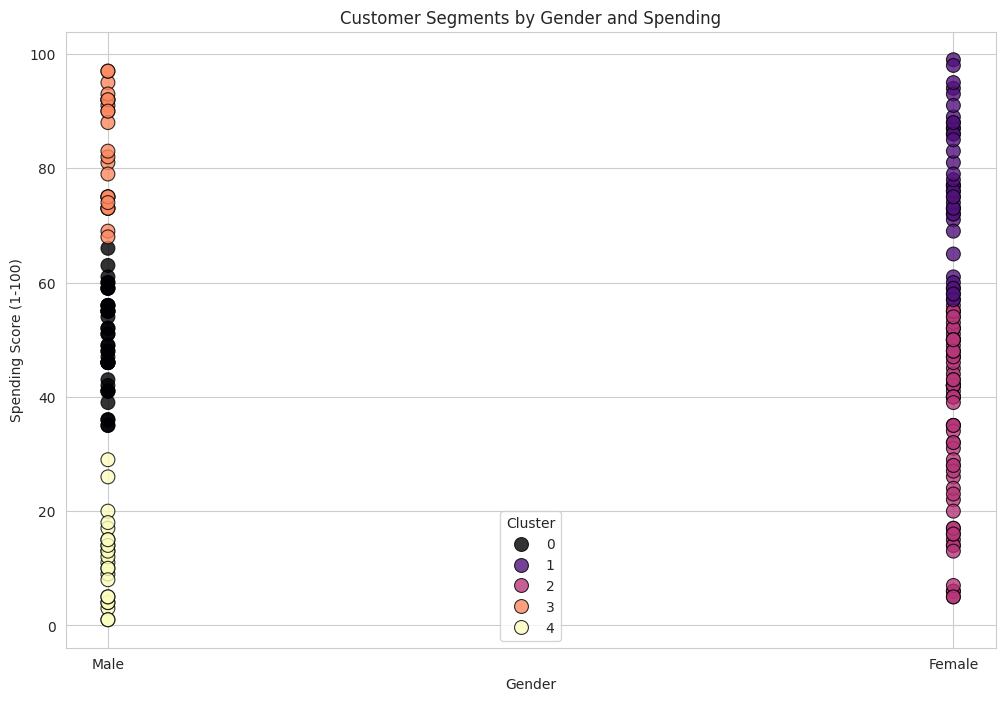

In [ ]:
# Build and fit the final model for Gender segmentation
kmeans3 = KMeans(n_clusters=5, init='k-means++', random_state=42, n_init=10)
df['Gender_Cluster'] = kmeans3.fit_predict(X3_scaled)

# Visualize the new clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='Gender', y='Spending Score (1-100)',
                hue='Gender_Cluster', palette='magma', s=100, alpha=0.8, edgecolor='black')
plt.title('Customer Segments by Gender and Spending')
plt.legend(title='Cluster')
plt.show()

### Insights from Gender-Spending Score Segmentation

Based on the K-Means clustering with Gender and Spending Score:

*   The plot shows that customers tend to cluster based on their Spending Score, with different clusters representing low, medium, and high spending groups.
*   Within these spending groups, the clusters don't show a strong separation based on Gender. Both Male and Female customers appear in similar spending score clusters. This suggests that within this dataset, Gender might not be a primary driver of spending behavior when considered in isolation with spending score.
*   The clustering primarily segments customers along the Spending Score axis, creating horizontal bands of clusters in the scatter plot. The one-hot encoding of Gender has effectively created two vertical "lanes" in the plot (one for Male, one for Female), and the clustering is happening within these lanes based on spending.

This segmentation provides a view of how spending habits distribute across Gender, highlighting spending groups rather than distinct Gender-based spending patterns.

In [ ]:
# Feature Engineering: Create an interaction term
df['Income_Spending_Interaction'] = df['Annual Income (k$)'] * df['Spending Score (1-100)']

# Select the features for clustering, including the new interaction term
X_engineered = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Income_Spending_Interaction']]

# Scale the engineered features
scaler_engineered = StandardScaler()
X_engineered_scaled = scaler_engineered.fit_transform(X_engineered)

print("Engineered features created and scaled.")
print(f"Shape of engineered features: {X_engineered_scaled.shape}")

Engineered features created and scaled.
Shape of engineered features: (200, 4)


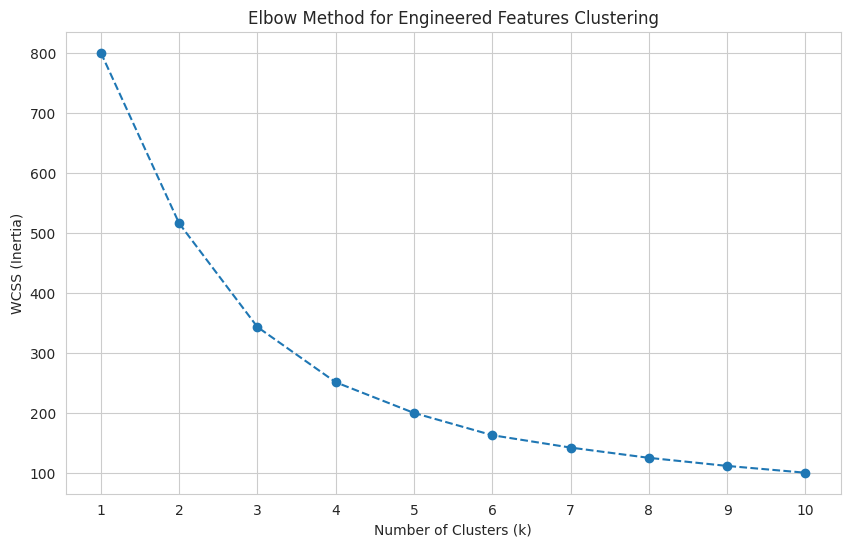

In [ ]:
# Implement the Elbow Method for engineered features
wcss_engineered = []
for k in range(1, 11):
    kmeans_engineered = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    kmeans_engineered.fit(X_engineered_scaled)
    wcss_engineered.append(kmeans_engineered.inertia_)

# Plot the Elbow Curve for engineered features
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss_engineered, marker='o', linestyle='--')
plt.title('Elbow Method for Engineered Features Clustering')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Inertia)')
plt.xticks(range(1, 11))
plt.show()

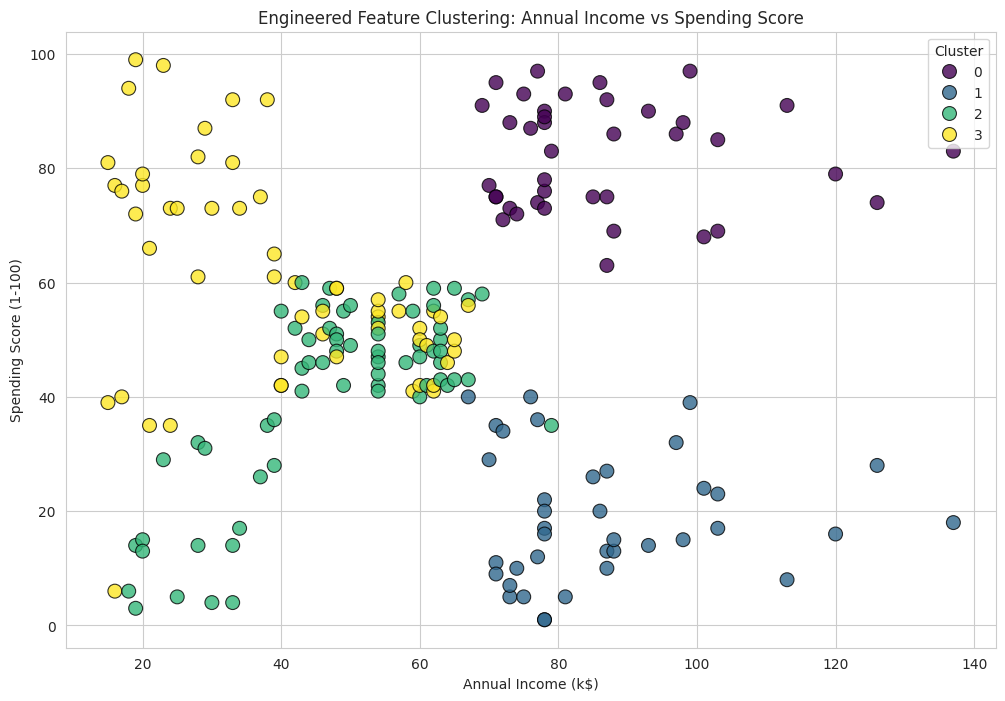

In [ ]:
# Build and fit the KMeans model with 5 clusters using engineered features
kmeans_engineered = KMeans(n_clusters=4, init='k-means++', random_state=42, n_init=10)
df['Engineered_Cluster'] = kmeans_engineered.fit_predict(X_engineered_scaled)

# Visualize the clusters (we can visualize pairs of features)
# Let's visualize using Annual Income, Spending Score, and Age, colored by the new cluster
fig = px.scatter_3d(df,
                    x='Annual Income (k$)',
                    y='Spending Score (1-100)',
                    z='Age',
                    color='Engineered_Cluster',
                    title='3D View of Customer Data with Engineered Feature Clustering')
fig.show()

# We can also visualize a 2D scatter plot, for example, Income vs Spending Score
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)',
                hue='Engineered_Cluster', palette='viridis', s=100, alpha=0.8, edgecolor='black')
plt.title('Engineered Feature Clustering: Annual Income vs Spending Score')
plt.legend(title='Cluster')
plt.show()

### Clustering with Income-Spending Interaction and Gender

In [ ]:
# Select the engineered interaction term and the Gender feature
X_gender_engineered = df[['Gender', 'Income_Spending_Interaction']].copy()

# One-hot encode the Gender feature
X_gender_engineered = pd.get_dummies(X_gender_engineered, columns=['Gender'], drop_first=True)

# Scale the selected features
scaler_gender_engineered = StandardScaler()
X_gender_engineered_scaled = scaler_gender_engineered.fit_transform(X_gender_engineered)

print("Selected features (Gender and Income-Spending Interaction) are ready for clustering.")
print(f"Shape of the feature set: {X_gender_engineered_scaled.shape}")

Selected features (Gender and Income-Spending Interaction) are ready for clustering.
Shape of the feature set: (200, 2)


### Elbow Method for Income-Spending Interaction and Gender Clustering

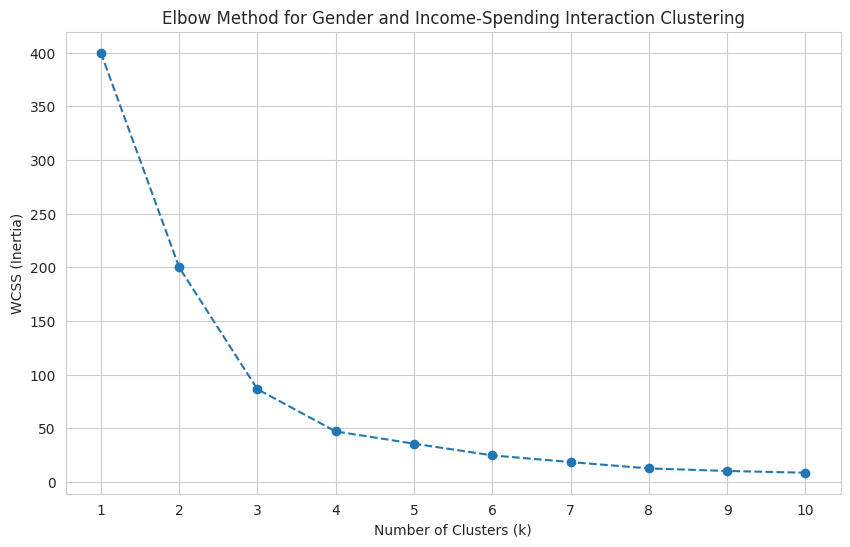

In [ ]:
# Implement the Elbow Method
wcss_gender_engineered = []
for k in range(1, 11):
    kmeans_gender_engineered = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    kmeans_gender_engineered.fit(X_gender_engineered_scaled)
    wcss_gender_engineered.append(kmeans_gender_engineered.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss_gender_engineered, marker='o', linestyle='--')
plt.title('Elbow Method for Gender and Income-Spending Interaction Clustering')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Inertia)')
plt.xticks(range(1, 11))
plt.show()

### Build and Visualize the Clustering Model

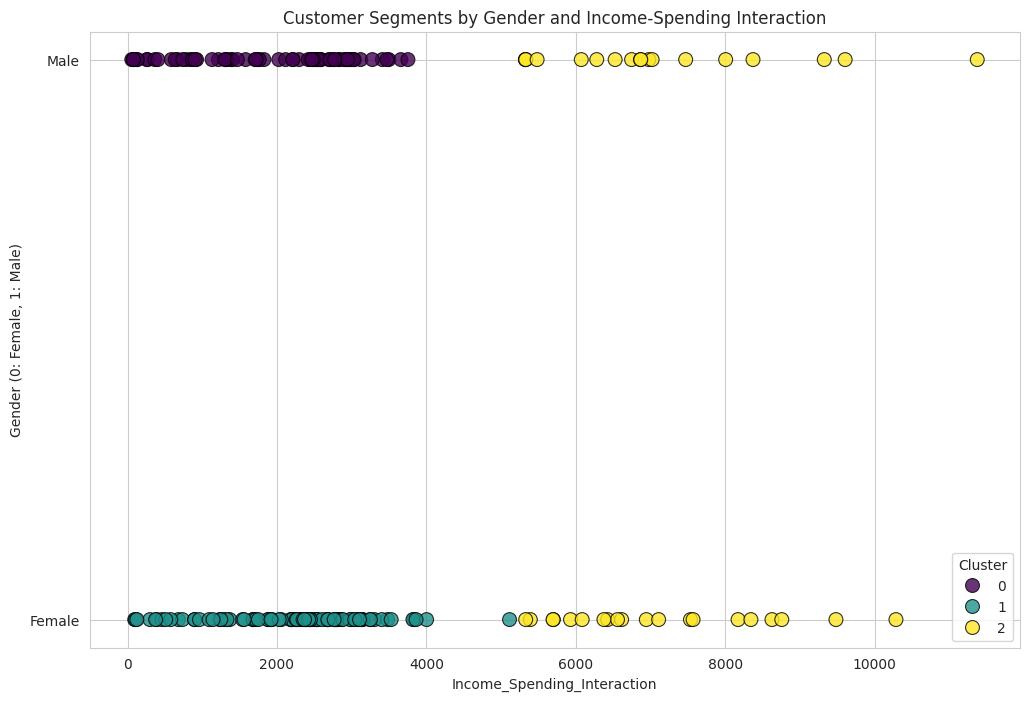

In [ ]:
# Based on the elbow method, choose the optimal number of clusters
# Let's choose k=X (replace X with the number you choose based on the elbow plot)
# For demonstration, let's assume k=3 (you should adjust this based on the plot)
optimal_k_gender_engineered = 3 # <--- **Adjust this value based on the Elbow plot above**

# Build and fit the KMeans model
kmeans_gender_engineered = KMeans(n_clusters=optimal_k_gender_engineered, init='k-means++', random_state=42, n_init=10)
df['Gender_Engineered_Cluster'] = kmeans_gender_engineered.fit_predict(X_gender_engineered_scaled)

# Visualize the clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='Income_Spending_Interaction', y='Gender',
                hue='Gender_Engineered_Cluster', palette='viridis', s=100, alpha=0.8, edgecolor='black')
plt.title('Customer Segments by Gender and Income-Spending Interaction')
plt.ylabel('Gender (0: Female, 1: Male)') # Add y-label for clarity after one-hot encoding
plt.legend(title='Cluster')
plt.show()

### Quantitative Persona Analysis for Gender and Income-Spending Interaction Clusters

In [ ]:
cluster_profiles_gender_engineered = df.groupby('Gender_Engineered_Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Income_Spending_Interaction']].mean().round(2)
cluster_profiles_gender_engineered['Size'] = df['Gender_Engineered_Cluster'].value_counts()
print("--- Gender and Income-Spending Interaction Cluster Profiles ---")
display(cluster_profiles_gender_engineered)

--- Gender and Income-Spending Interaction Cluster Profiles ---


,Age,Annual Income (k$),Spending Score (1-100),Income_Spending_Interaction,Size
Gender_Engineered_Cluster,,,,,
0,41.49,55.83,39.73,1930.97,70
1,39.37,53.27,44.86,2199.43,92
2,32.74,86.92,82.42,7153.76,38


### Interpreting the Gender and Income-Spending Interaction Segments

### Insights from Engineered Feature Clustering

Based on the clustering with the engineered feature (`Income_Spending_Interaction`) along with Age, Annual Income, and Spending Score:

*   The clusters generated with the engineered feature appear to provide a more nuanced segmentation compared to using just Income and Spending Score or Age and Spending Score alone. The interaction term seems to help differentiate groups where the combined effect of income and spending is a significant factor.
*   Observing the 3D plot and the 2D Income vs. Spending Score plot, the clusters seem to capture distinct groups of customers based on their financial behavior and age. For example, we might see clusters representing:
    *   High income, high spending (high interaction term)
    *   Low income, low spending (low interaction term)
    *   Moderate income, moderate spending
    *   Potentially age-related clusters within these income/spending groups due to the inclusion of Age.
*   The specific interpretation of each cluster would require examining the quantitative cluster profiles (mean values of features per cluster), which we can generate next. However, visually, the separation of clusters suggests that the engineered feature has contributed to identifying potentially more specific customer segments.

This analysis with engineered features provides a richer understanding of customer behavior by considering the combined impact of income and spending.